# Author: Faique Ali

## Task 01 : Prediction Using Supervised ML 
<p>
    Using Linear Regression, predict the percentage of an student based on his no. of study hours.
</p>

# Imports

In [17]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

%matplotlib inline

# Constants

In [2]:
DATA_SOURCE_LINK = 'http://bit.ly/w-data'
COL_HRS = 'Hours'
COL_SCORES = 'Scores'

SCATTER_PLT_TITLE = 'Scatter Plot showing Students Nr. of Hours Studied VS Scored Marks'
SCATTER_PLT_XLABEL = 'HOURS'
SCATTER_PLT_YLABEL = 'SCORES'

## Step1: Gather the Data

In [3]:
data = pd.read_csv(DATA_SOURCE_LINK)

In [4]:
# Show first 5 rows
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
# Checking for null values in the data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


## Step 2: Visualizing the Data

#### Splitting Hours and Scores into two varibales

In [6]:
X = DataFrame(data, columns=[COL_HRS])
y = DataFrame(data, columns=[COL_SCORES])

#### Creating a scatter plot

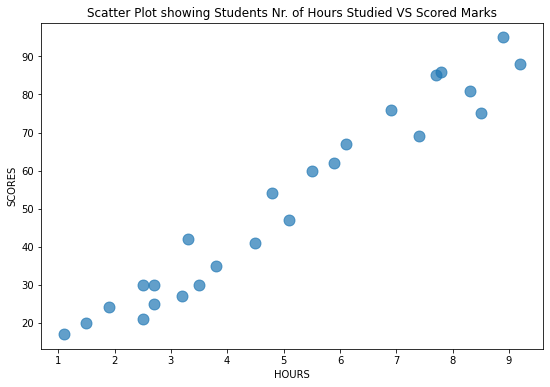

In [7]:
plt.figure(figsize=(9,6))

# Specifying plot type
plt.scatter(X,y, s=120, alpha=0.7)

# Adding labels to the plot
plt.title(SCATTER_PLT_TITLE)
plt.xlabel(SCATTER_PLT_XLABEL)
plt.ylabel(SCATTER_PLT_YLABEL)

#
plt.show()

## Step 3: Training the Model on Testing Data

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.2)

In [9]:
# Creating an obj
regression = LinearRegression()

regression.fit(X_train, y_train)

LinearRegression()

#### Slope coefficient (Theta_1)

In [10]:
regression.coef_

array([[9.91065648]])

#### Intercept

The intercept here is a +ve value. It represents that a student with `0hrs` of preparation can score at least `2 marks`

In [11]:
regression.intercept_

array([2.01816004])

## Step 4: Testing outcomes on Test Data

In [12]:
# Making predictions on testing data
predicted_scores = regression.predict(X_test)
predicted_scores

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [13]:
# Convert numpy nd array to 1d array
predicted_scores = predicted_scores.flatten()

# Extracting Hrs cols from X_test
nr_of_hrs = X_test['Hours'].to_numpy()

# Displaying our test results into a Data frame
test_df = pd.DataFrame(data={'Nr.of Hrs': nr_of_hrs, 'Scored Marks': predicted_scores})
test_df

,Nr.of Hrs,Scored Marks
0,1.5,16.884145
1,3.2,33.732261
2,7.4,75.357018
3,2.5,26.794801
4,5.9,60.491033


## Step 5: Plotting Regression Line

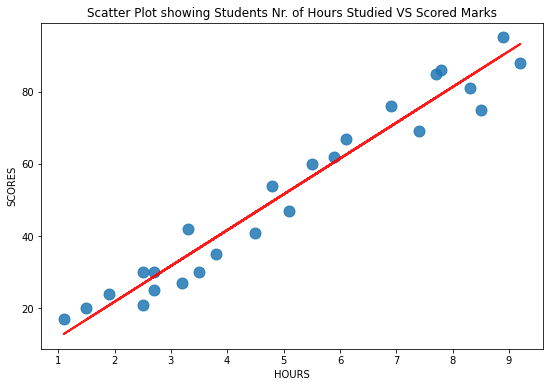

In [14]:
plt.figure(figsize=(9,6))

# Specifying plot type
plt.scatter(X,y, s=120, alpha=0.85)

# To plot regression line
plt.plot(X, regression.predict(X), color='red', linewidth=2, alpha= 0.9)

# Adding labels to the plot
plt.title(SCATTER_PLT_TITLE)
plt.xlabel(SCATTER_PLT_XLABEL)
plt.ylabel(SCATTER_PLT_YLABEL)

#
plt.show()

## Step 6: Comparing & Evaluating our Model

In [15]:
# Extracting Scores cols from y_test
actual_scores = y_test['Scores'].to_numpy()

# Displaying our test results into a Data frame
act_vs_pred_df = pd.DataFrame(data={'Actual Scores': actual_scores, 'Predicted Scores': predicted_scores})
act_vs_pred_df

,Actual Scores,Predicted Scores
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Estimating training and testing accuracy or $R^{2}$

In [16]:
print(f'Training Accuracy: ', regression.score(X_train,y_train))
print(f'Testing Accuracy: ', regression.score(X_test,y_test))

Training Accuracy:  0.9515510725211552
Testing Accuracy:  0.9454906892105356


### Evaluating model

In [20]:
print(f'Mean Squared Error: ', metrics.mean_squared_error(y_test,predicted_scores))
print(f'Mean Absolute Error: ', metrics.mean_absolute_error(y_test,predicted_scores))

Mean Squared Error:  21.5987693072174
Mean Absolute Error:  4.183859899002975


# `Making Predictions `

<b>What will be the predicted score if a student studies for 9.25 hrs/day?<b>

In [34]:
hrs = 9.25
pred = regression.predict([[hrs]])

print(f'Nr of hrs studied: {hrs}')
print(f'Obtained marks/score: {pred[0][0]}')

Nr of hrs studied: 9.25
Obtained marks/score: 93.69173248737538
